# Machine Learning - Titanic Project


In [62]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquiring data



In [63]:
train_df=pd.read_csv('../input/train.csv')
test_df=pd.read_csv('../input/test.csv')

#train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
combine=[train_df, test_df]
combine

[     PassengerId  Survived  Pclass    ...         Fare        Cabin  Embarked
 0              1         0       3    ...       7.2500          NaN         S
 1              2         1       1    ...      71.2833          C85         C
 2              3         1       3    ...       7.9250          NaN         S
 3              4         1       1    ...      53.1000         C123         S
 4              5         0       3    ...       8.0500          NaN         S
 5              6         0       3    ...       8.4583          NaN         Q
 6              7         0       1    ...      51.8625          E46         S
 7              8         0       3    ...      21.0750          NaN         S
 8              9         1       3    ...      11.1333          NaN         S
 9             10         1       2    ...      30.0708          NaN         C
 10            11         1       3    ...      16.7000           G6         S
 11            12         1       1    ...      26.5

## Explaratory Data Analysis



In [66]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [69]:
train_df.info()
#cabin age and embarked have missing values
#survival:   Survival
#PassengerId: Unique Id of a passenger.
#pclass: Ticket class    
#sex:    Sex 
#Age:    Age in years    
#sibsp:  # of siblings / spouses aboard the Titanic  
#parch:  # of parents / children aboard the Titanic  
#ticket: Ticket number   
#fare:   Passenger fare  
#cabin:  Cabin number    
#embarked:   Port of Embarkation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [70]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [71]:
#of values that are null
total=train_df.isnull().sum().sort_values(ascending=False)
total
percent_1=(train_df.isnull().sum()/train_df.isnull().count())*100
percent_1
percent_2=round(percent_1,1).sort_values(ascending=False)
nulltotal1=pd.DataFrame(percent_2,columns=['Percentage'])
nulltotal1
nulltotal2=pd.DataFrame(total, columns=['Total'])
nulltotal2
missing_data_table=pd.concat([nulltotal2,nulltotal1], axis=1)
missing_data_table


,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [72]:
#Survival Rate
(train_df['Survived']==1).sum()/(len(train_df['Survived']))
#parents/children rate
(train_df['Parch']==0).sum()/(len(train_df['Parch']))
#rate of siblings/spouse
(train_df['SibSp']==0).sum()/(len(train_df['Parch']))
# %fares above 512
(train_df['Fare']>=512).sum()/(len(train_df['Fare']))
# %elderly peeps
(train_df['Age']>=65).sum()/(len(train_df['Age']))

0.012345679012345678

In [73]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
#unique names
print('Unique names boarded on the titanic', train_df['Name'].nunique())
#ratio of males
print('The % of males on the boat is',((train_df['Sex']=='male').sum()/(len(train_df['Sex']))*100))
#different cabins
train_df['Cabin'].value_counts()
#Different Embarked
train_df['Embarked'].value_counts()

Unique names boarded on the titanic 891
The % of males on the boat is 64.75869809203144


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
#to describe string columns
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsson, Mr. Nils Johan Goransson",male,CA. 2343,G6,S
freq,1,577,7,4,644


## Analyzing individual features agaisnt survival rate


In [76]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [77]:
pd.crosstab(train_df['Survived'], train_df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [78]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [79]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [80]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Visualizing Data




/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


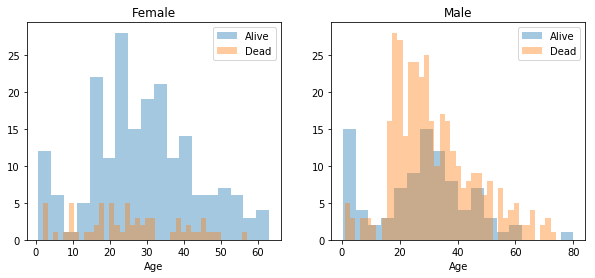

In [81]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax=sns.distplot(women[train_df['Survived']==1]['Age'].dropna(),ax=axes[0],kde=False,bins=18, label='Alive')
ax=sns.distplot(women[train_df['Survived']==0]['Age'].dropna(),ax=axes[0],kde=False,bins=40,label='Dead')
axes[0].set_title('Female')
axes[0].legend()
ax=sns.distplot(men[train_df['Survived']==1]['Age'].dropna(),ax=axes[1],kde=False,bins=18, label='Alive')
ax=sns.distplot(men[train_df['Survived']==0]['Age'].dropna(),ax=axes[1],kde=False,bins=40, label='Dead')
axes[1].set_title('Male')
axes[1].legend()




/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


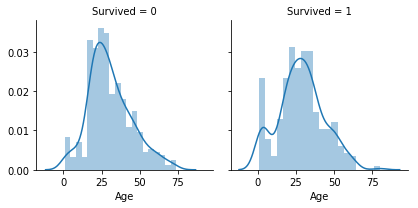

In [82]:
#g = sns.FacetGrid(train_df, col='Survived')
#g.map(plt.hist, 'Age', bins=20)
g=sns.FacetGrid(train_df, col='Survived')
g.map(sns.distplot, 'Age', bins=20)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


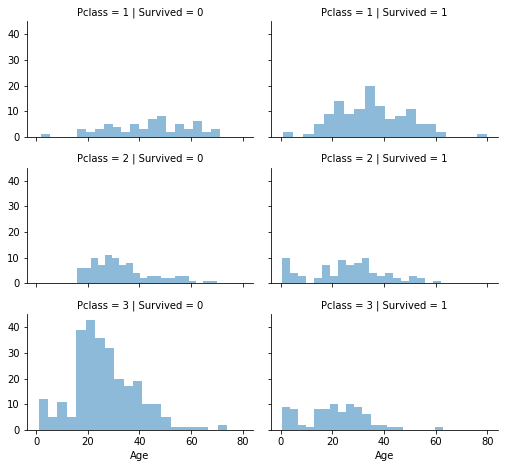

In [83]:

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age',alpha=.5, bins=20)
grid.add_legend();


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


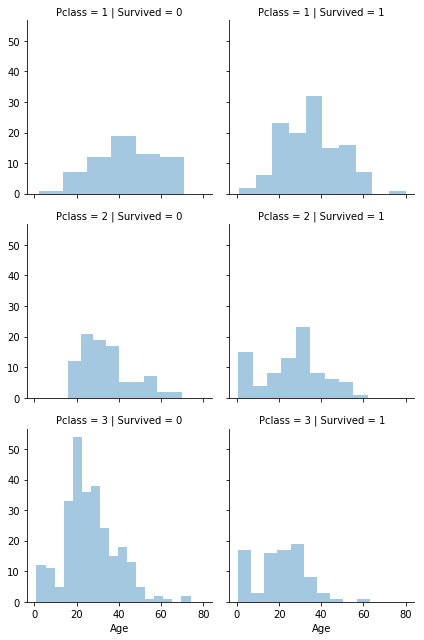

In [84]:
#2nd way of plotting the same graph above
grid=sns.FacetGrid(train_df,col='Survived', row='Pclass')
grid.map(sns.distplot,'Age',kde=False)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


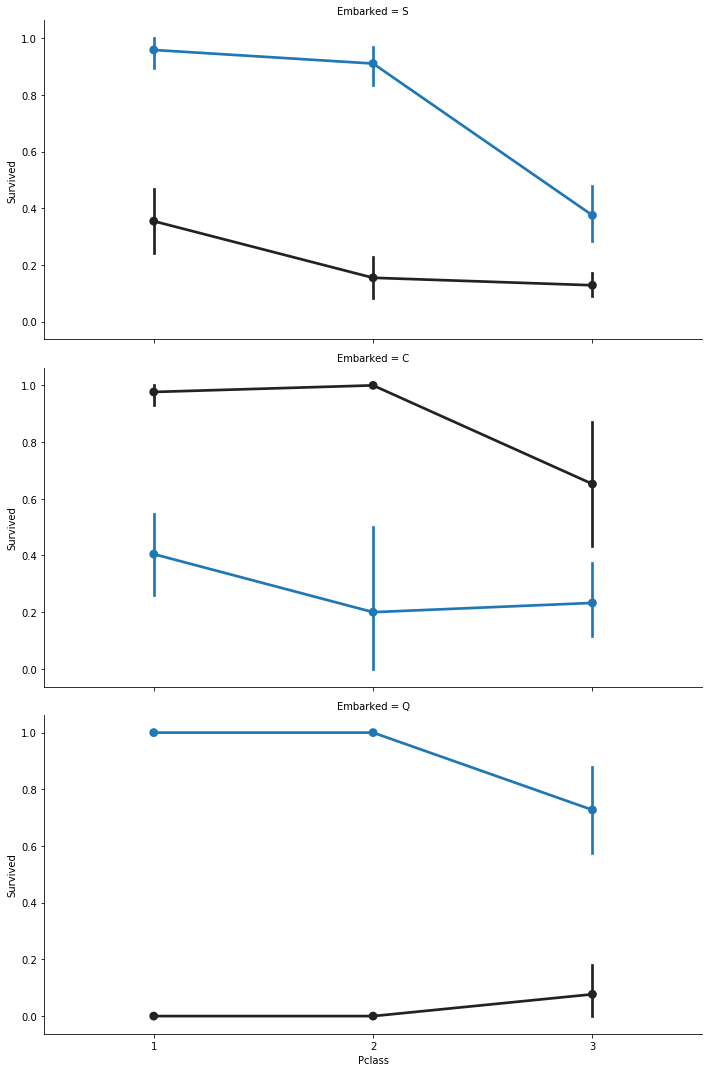

In [85]:
#FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
#FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
#FacetGrid.add_legend()
FacetGrid=sns.FacetGrid(train_df,row='Embarked', size=5, aspect=2)
FacetGrid.map(sns.pointplot,'Pclass', 'Survived', 'Sex')

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


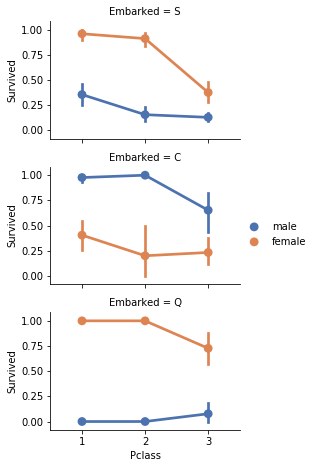

In [86]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


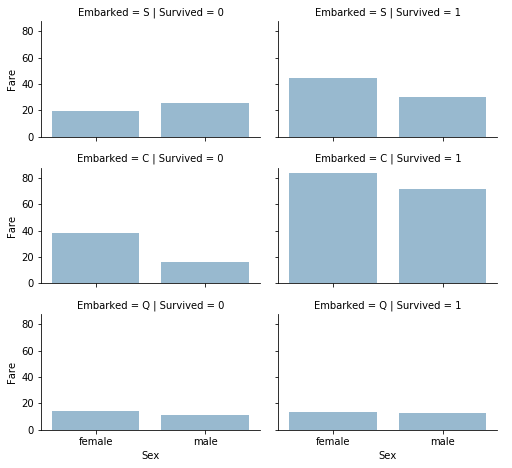

In [87]:
#grid=sns.FacetGrid(train_df, col='Survived',row='Embarked')
#grid.map(sns.barplot,'Sex','Fare')

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


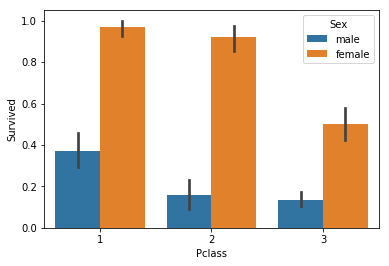

In [88]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=train_df)

## Feature Engineering

In [89]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df.head()
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [90]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [91]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#pd.crosstab(train_df['Title'], train_df['Survived'])

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [92]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [93]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [94]:
train_df.head()
#test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [95]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#different way of creating new column based on condition
#train_df["not_alone"]=np.where(train_df['relatives']>0, '0', '1')

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [96]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [97]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [98]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,1,2,0
1,1,1,female,38.0,1,0,71.2833,C,3,2,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,1
3,1,1,female,35.0,1,0,53.1000,S,3,2,0
4,0,3,male,35.0,0,0,8.0500,S,1,1,1


In [99]:
train_df['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

Text(0.5,1,'Survival Numbers Depending on Relatives')

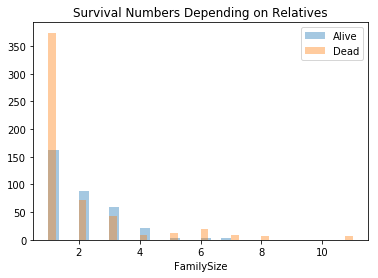

In [100]:
fig,axes = plt.subplots()
ax=sns.distplot(train_df[train_df['Survived']==1]['FamilySize'].dropna(),kde=False,bins=18, label='Alive')
ax=sns.distplot(train_df[train_df['Survived']==0]['FamilySize'].dropna(),kde=False,bins=40,label='Dead')
ax.legend()
ax.set_title('Survival Numbers Depending on Relatives')

#grid = sns.FacetGrid(train_df, col='Survived', size=2.2, aspect=1.6)
#grid.map(plt.hist, 'relatives', alpha=.5, bins=20)

In [101]:
train_df[['Survived','FamilySize']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)


,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [102]:
pd.crosstab(train_df['FamilySize'], train_df['Survived'])

Survived,0,1
FamilySize,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


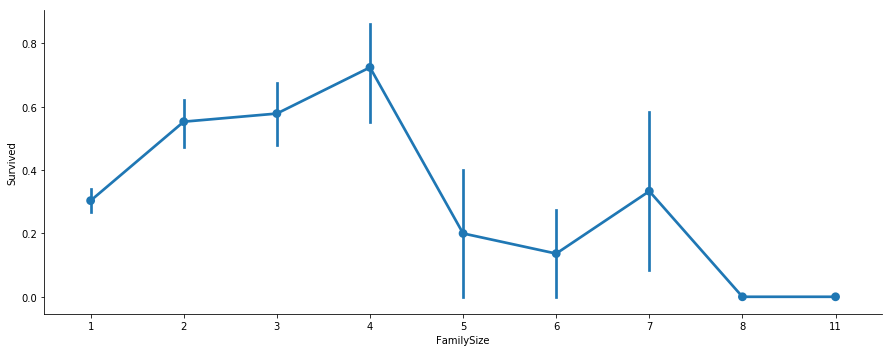

In [103]:
axes = sns.factorplot('FamilySize','Survived', 
                      data=train_df, aspect = 2.5, )

In [104]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,3,0
2,1,3,female,26.0,7.9250,S,2,1
3,1,1,female,35.0,53.1000,S,3,0
4,0,3,male,35.0,8.0500,S,1,1


In [105]:
for dataset in combine:
    dataset['Sex']=dataset["Sex"].map({'female':1,'male':0})


train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
IsAlone     891 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


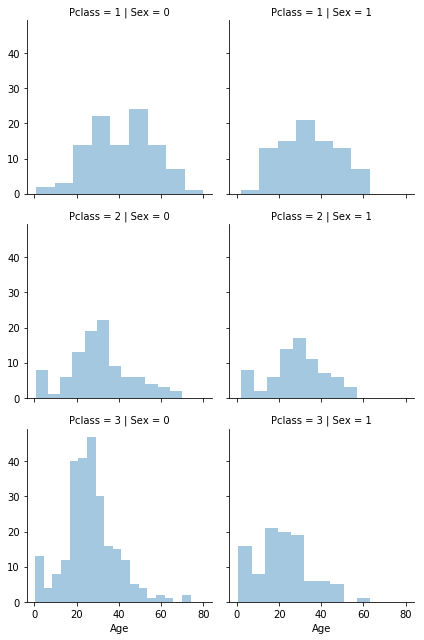

In [106]:
#Null Values

#look at the distribution of age per gender and pclass
grid=sns.FacetGrid(train_df,row='Pclass',col='Sex')
grid.map(sns.distplot,'Age',kde=False)


In [107]:
guessed_array=np.zeros((2,3))
#guessed_array[0,0]=2
guessed_array

array([[0., 0., 0.],
       [0., 0., 0.]])

In [108]:
combine=[train_df,test_df]
for dataset in combine:
    for i in range (0,2):
        for j in range (0,3):
            age_per_category= dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess=age_per_category.median()
            guessed_array[i,j] = int(age_guess/0.5 + 0.5 ) * 0.5
            
for dataset in combine:
    for i in range (0,2):
        for j in range (0,3):
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age'] = guessed_array[i,j]
     
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()
            
            
 #just practicing for the above cell - due to the chaining effect, the below line will not update the original datafframe column of age, you need to use the loc fucntion
#(train_df[(train_df['Age'].isnull()) & (train_df['Sex']==0) & (train_df['Pclass']==3)])['Age']=2
#(train_df.loc[(train_df.Age.isnull()) & (train_df.Sex == 0) & (train_df.Pclass == 3)])       

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22,7.2500,S,1,0
1,1,1,1,38,71.2833,C,3,0
2,1,3,1,26,7.9250,S,2,1
3,1,1,1,35,53.1000,S,3,0
4,0,3,0,35,8.0500,S,1,1


In [109]:
#split age into categories
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df["AgeBand"].value_counts()


(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeBand, dtype: int64

In [110]:
train_df[['AgeBand', 'Survived']].groupby(["AgeBand"]).mean()

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [111]:
pd.crosstab(train_df['AgeBand'], train_df['Survived'])

Survived,0,1
AgeBand,,
"(-0.08, 16.0]",45,55
"(16.0, 32.0]",328,167
"(32.0, 48.0]",127,89
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


In [112]:
#just testing how pivot tables work.
#train_df['Survived1']=train_df['Survived']
#pd.pivot_table(train_df,index=['AgeBand'], columns='Survived',values='Survived1',aggfunc=np.sum)
#train_df = train_df.drop(['Survived1'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
0,0,3,0,22,7.2500,S,1,0,"(16.0, 32.0]"
1,1,1,1,38,71.2833,C,3,0,"(32.0, 48.0]"
2,1,3,1,26,7.9250,S,2,1,"(16.0, 32.0]"
3,1,1,1,35,53.1000,S,3,0,"(32.0, 48.0]"
4,0,3,0,35,8.0500,S,1,1,"(32.0, 48.0]"


In [113]:
combine=[train_df,test_df]
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
train_df.head(5)



,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
0,0,3,0,1,7.2500,S,1,0,"(16.0, 32.0]"
1,1,1,1,2,71.2833,C,3,0,"(32.0, 48.0]"
2,1,3,1,1,7.9250,S,2,1,"(16.0, 32.0]"
3,1,1,1,2,53.1000,S,3,0,"(32.0, 48.0]"
4,0,3,0,2,8.0500,S,1,1,"(32.0, 48.0]"


In [114]:
train_df=train_df.drop(['AgeBand'],axis=1)
combine=[train_df,test_df]


In [115]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [116]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

#same 2 same as above
#train_df[['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [117]:
Embarked_max=train_df['Embarked'].mode()[0]


In [118]:
combine=[train_df,test_df]
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(Embarked_max)

In [119]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [120]:
#can now convert the EmbarkedFill feature by creating a new numeric Port feature.
Embarked_dic={'S':0,'C':1,'Q':2}
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map(Embarked_dic)

In [121]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [122]:
#Filling Fare NUll Value
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


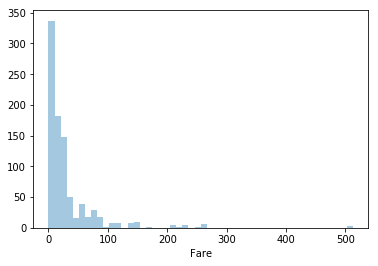

In [123]:
sns.distplot(train_df['Fare'],kde=False)

In [124]:
#Fare Band
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [125]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,7.2500,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,71.2833,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,7.9250,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,53.1000,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,8.0500,0,1,1,6,"(7.91, 14.454]"


In [126]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <=7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare']<=14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare'] <=31), 'Fare']=2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


In [127]:
train_df['Fare'].value_counts()

2    229
0    223
3    222
1    217
Name: Fare, dtype: int64

In [128]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,0,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,3,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,1,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,3,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,1,0,1,1,6,"(7.91, 14.454]"
5,0,3,0,1,1,2,1,1,3,"(7.91, 14.454]"
6,0,1,0,3,3,0,1,1,3,"(31.0, 512.329]"
7,0,3,0,0,2,0,4,0,0,"(14.454, 31.0]"
8,1,3,1,1,1,0,3,0,3,"(7.91, 14.454]"
9,1,2,1,0,2,1,3,0,0,"(14.454, 31.0]"


In [129]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [130]:
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

## Prediciton and Modelling
 
 we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [131]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [132]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
Y_pred

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

#.score formula= takes in x_train, internally calculates y_train_predict and compares it to y_train

#logreg.score(X_train, Y_train) is equivalent to your print(classification_report(Y_train, Y_pred_train)). But you do not need to calculate Y_pred; that is done internally by the library

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.26

In [133]:
logreg.coef_[0]

array([-1.08351482,  2.20097754, -0.37164741, -0.02206186,  0.2810258 ,
        0.41436249,  0.26208408, -0.08595872])

In [134]:
coeff_df = pd.DataFrame(train_df.columns.delete(0),columns=['Feature'])

coeff_df
coeff_df["Correlation"] = pd.DataFrame(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


In [135]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

NameError: name 'SVC' is not defined

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

.

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

### Model evaluation



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)